In [1]:
import numpy as np
import pandas as pd

In [2]:
hybrid = pd.read_csv('hybrid.csv')
#hybrid.iloc[:,0]
hybrid.head()

,Unnamed: 0,id,campaign_id,coupon_id,customer_id,redemption_status,recency,history,used_discount,used_bogo,is_referral,channel,offer,conversion
0,0,1,13,27,1053,1,10,142.44,1,0,0,Phone,Buy One Get One,0
1,1,2,13,116,48,1,6,329.08,1,1,1,Web,No Offer,0
2,2,6,9,635,205,1,7,180.65,0,1,1,Web,Buy One Get One,0
3,3,7,13,644,1050,1,9,675.83,1,0,1,Web,Discount,0
4,4,9,8,1017,1489,1,2,45.34,1,0,0,Web,Buy One Get One,0


In [3]:
hybrid = hybrid.drop(['Unnamed: 0'], axis=1)

In [4]:
hybrid.dtypes

id                     int64
campaign_id            int64
coupon_id              int64
customer_id            int64
redemption_status      int64
recency                int64
history              float64
used_discount          int64
used_bogo              int64
is_referral            int64
channel               object
offer                 object
conversion             int64
dtype: object

In [5]:
hybrid[hybrid['redemption_status'] == hybrid['conversion']]

,id,campaign_id,coupon_id,customer_id,redemption_status,recency,history,used_discount,used_bogo,is_referral,channel,offer,conversion
5,11,11,795,793,1,6,134.83,0,1,0,Phone,Buy One Get One,1
10,20,9,575,108,1,7,548.91,0,1,1,Phone,Buy One Get One,1
13,23,13,517,1067,1,2,101.64,0,1,0,Web,Discount,1
15,25,13,796,248,1,3,58.13,1,0,1,Web,No Offer,1
22,33,12,109,553,1,2,118.40,1,0,0,Web,Discount,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63995,105100,8,559,34,0,10,105.54,1,0,0,Web,Discount,0
63996,105102,30,918,369,0,5,38.91,0,1,1,Phone,Discount,0
63997,105103,26,502,233,0,6,29.99,1,0,1,Phone,Discount,0
63998,105104,8,432,770,0,1,552.94,1,0,1,Multichannel,Buy One Get One,0


In [6]:
hybrid[(hybrid['used_bogo']==1) & (hybrid['offer']=='Buy One Get One') & (hybrid['conversion'] == 1)]

,id,campaign_id,coupon_id,customer_id,redemption_status,recency,history,used_discount,used_bogo,is_referral,channel,offer,conversion
5,11,11,795,793,1,6,134.83,0,1,0,Phone,Buy One Get One,1
10,20,9,575,108,1,7,548.91,0,1,1,Phone,Buy One Get One,1
87,141,8,658,638,1,6,165.77,0,1,0,Web,Buy One Get One,1
142,228,29,538,634,1,11,131.76,0,1,1,Web,Buy One Get One,1
155,255,12,819,1026,1,3,57.33,0,1,0,Web,Buy One Get One,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63894,104934,10,15,1582,0,8,194.46,0,1,1,Phone,Buy One Get One,1
63896,104936,8,6,652,0,1,391.46,0,1,1,Phone,Buy One Get One,1
63904,104951,10,1043,226,0,1,29.99,0,1,0,Web,Buy One Get One,1
63951,105033,8,1084,1410,0,10,50.94,0,1,0,Web,Buy One Get One,1


In [7]:
cate_cols = list(hybrid.select_dtypes(include = ['object']).columns)
num_cols = list(hybrid.select_dtypes(include = ['int64','float64']).columns)

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

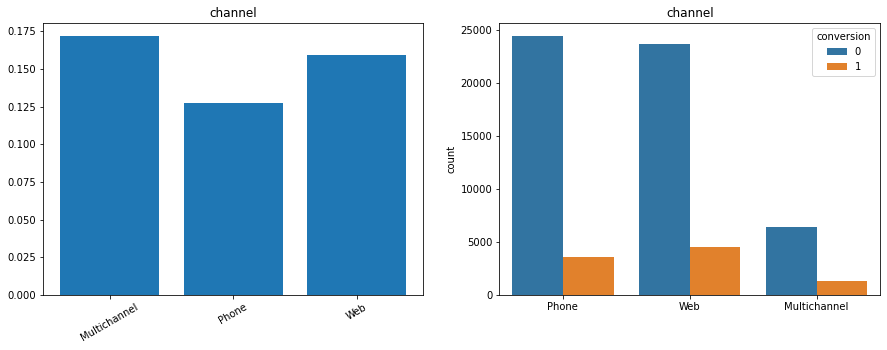

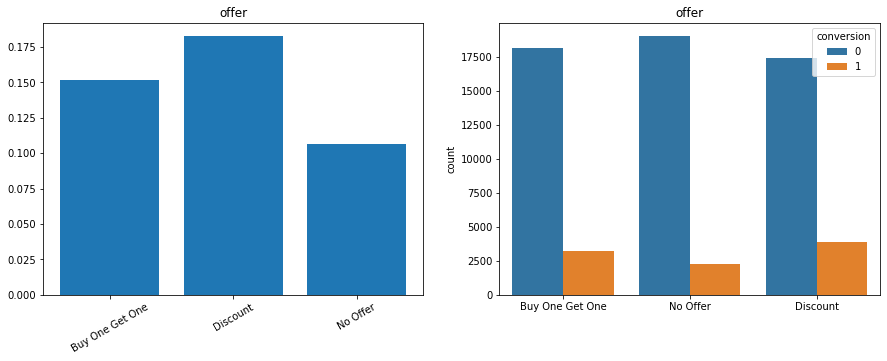

In [9]:
for col in cate_cols:
    if col not in [ 'redemption_status', 'conversion']:
        f,(axis1,axis2) = plt.subplots(1,2,figsize = (15,5))
        response_rate = hybrid[[col,'conversion']].groupby([col]).mean()
        N = len(list(response_rate.index))
        ind = np.arange(N)
        axis1.bar(ind, height = response_rate['conversion'])
        axis1.set_xticks(ticks = list(ind))
        axis1.set_xticklabels(labels = list(response_rate.index), rotation=30)
        axis1.set_title(col)
        sns.countplot(col, hue = 'conversion', data = hybrid, ax = axis2).set_title(col)
        axis2.set_xlabel('')

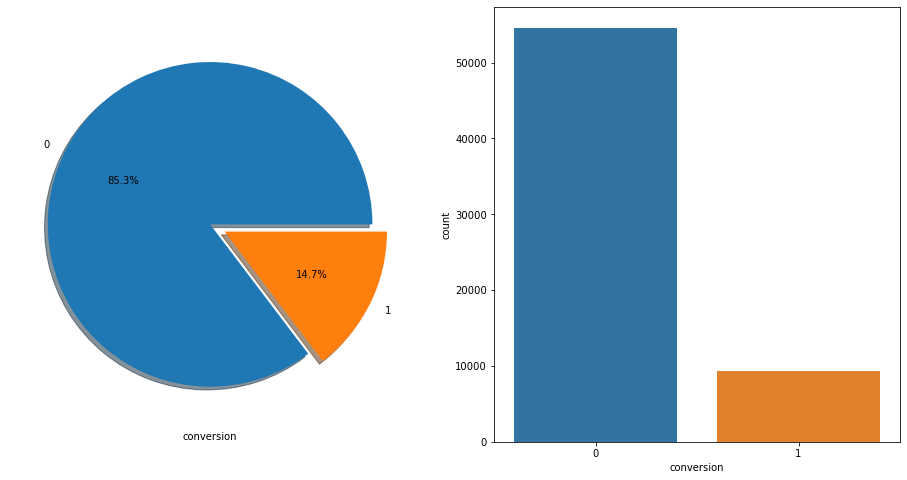

In [10]:
# conversion
f, (ax1,ax2) = plt.subplots(1,2,figsize = (16,8))
hybrid['conversion'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True, ax = ax1)
ax1.set_xlabel('conversion')
ax1.set_ylabel('')

sns.countplot('conversion',data=hybrid, ax = ax2)
plt.show()

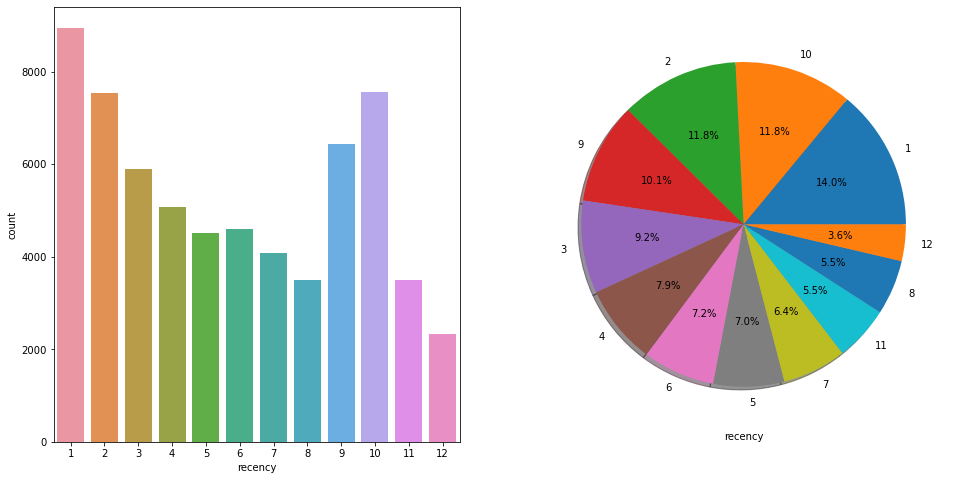

In [11]:
# recency
f, (ax2,ax1) = plt.subplots(1,2,figsize = (16,8))
hybrid['recency'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, ax = ax1)
ax1.set_xlabel('recency')
ax1.set_ylabel('')

sns.countplot('recency',data=hybrid, ax = ax2)
plt.show()

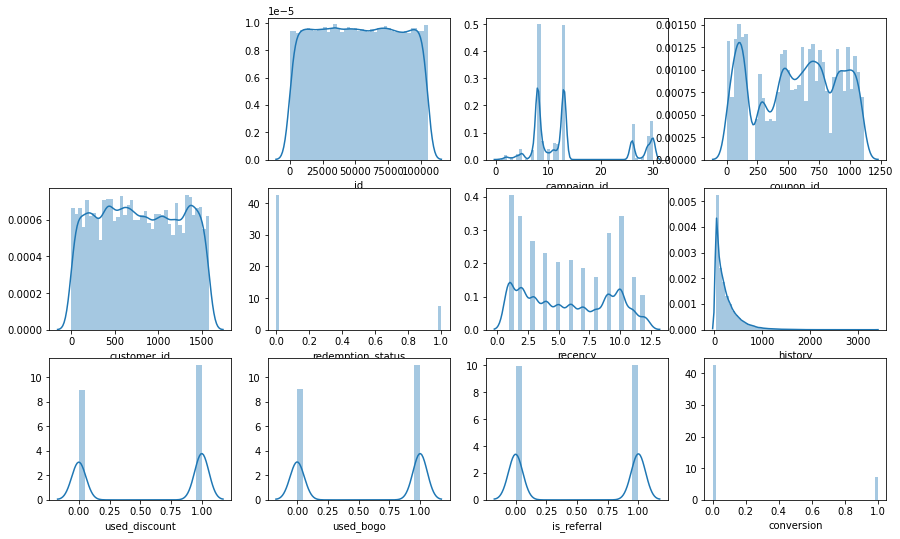

In [14]:
plt.figure(figsize = (15,12))
i =2
for col in num_cols:
    plt.subplot(4,4,i)
    sns.distplot(hybrid[col])
    i+=1

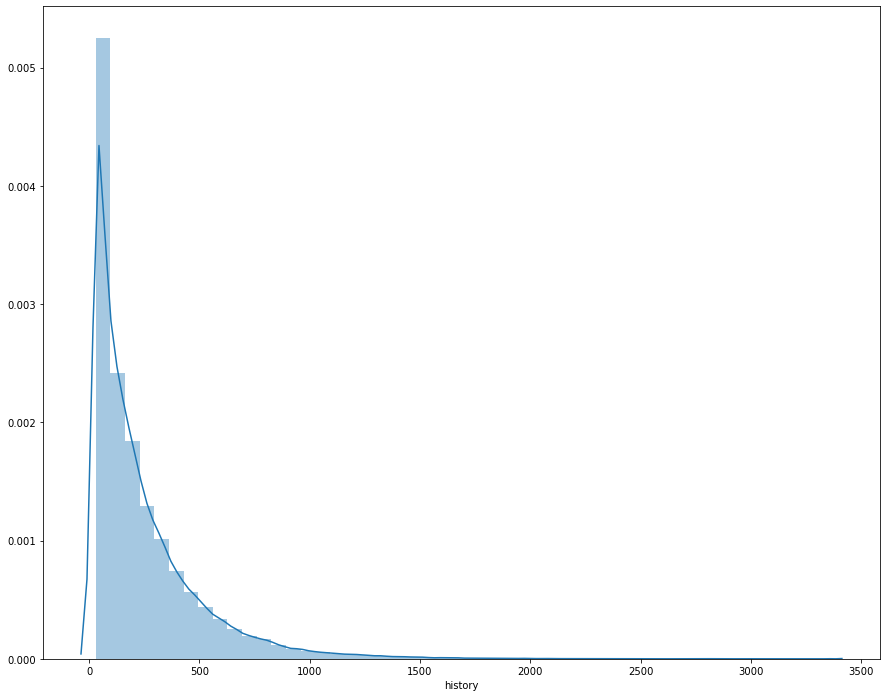

In [13]:
plt.figure(figsize = (15,12))
sns.distplot(hybrid['history'])
plt.show()